In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def standing(): #Fungsi yang dibuat agar ketika dijalankan fungsi tersebut akan mulai mengerjakan program perhitungan IPR present 2 fasa dengan metode Standing.
    print("Pilih data laju alir yang tidak diketahui :")
    print("1. Laju alir (Q)")
    print("2. Laju alir maksimum (Qmax)")
    pla = input("Pilihan laju alir yang tidak diketahui (1/2) : ") #masukkan angka 1 atau 2 dari 2 pilihan laju alir diatas yang tidak diketahui.
    if pla == "1": #Jika memasukkan angka 1, maka akan dicari nilai laju alir pada tekanan bottomhole yang akan dimasukkan.
        Qmax = float(input("Masukkan nilai Qmax (bpd) : ")) #masukkan nilai laju alir maksimum.
        Pwf = float(input("Masukkan nilai Pwf (psi) : ")) #masukkan nilai tekanan bottomhole.
        FE = float(input("Masukkan nilai Flow Efficiency (FE) : ")) #masukkan nilai flow efficiency yang dipengaruhi oleh skin. 
        print("Pilih dari 2 tekanan yang tersedia. Jika data dari kedua tekanan tersebut tersedia, pilih tekanan reservoir :")
        print("1. Tekanan Reservoir (Pr)")
        print("2. Tekanan Statik Sumur (Ps)")
        pressure = input("Pilih salah satu tekanan yang ada di atas : ") #masukkan angka 1 atau 2 dari 2 pilihan tekanan diatas yang diketahui. Pilih angka 1 jika nilai kedua data tersebut diketahui.
        if pressure == "1": 
            Pr = float(input("Masukkan nilai Pr (psi): ")) #masukkan nilai tekanan reservoir.
            Pwf1 = Pr - FE * (Pr - Pwf) #rumus untuk mencari nilai tekanan bottomhole yang dipengaruhi oleh skin.
            print("Didapatkan nilai Pwf1 adalah ", str(Pwf1), " psi") #value Pwf1 yang ditunjukkan berupa string.
            Q = Qmax * (1 - 0.2 * (Pwf1 / Pr) - 0.8 * (Pwf1 / Pr) ** 2) #rumus korelasi standing antara laju alir dengan tekanan bottomhole dan tekanan reservoir.
            print("Didapatkan nilai Q pada tekanan Pwf " + str(Pwf) + " psi adalah " + str(Q) + " bpd.") #value Pwf dan Q yang ditunjukkan berupa string.
            Pwf = 0 #mengubah nilai dari variabel Pwf menjadi 0.
            daftaripr = [] #list kosong
            while Pwf <= Pr: #membuat loop/perulangan agar mendapatkan nilai tekanan bottomhole dan laju alir yang berbeda-beda hingga nilai tekanan bottomhole mencapai nilai tekanan reservoir.
                Pwf1 = Pr - FE * (Pr - Pwf) #rumus untuk mencari nilai tekanan bottomhole yang dipengaruhi oleh skin.
                Q = Qmax * (1 - 0.2 * (Pwf1 / Pr) - 0.8 * (Pwf1 / Pr) ** 2) #rumus korelasi standing antara laju alir dengan tekanan bottomhole dan tekanan reservoir.
                daftaripr.append({"Bottomhole Pressure, Pwf (psi)": str(Pwf), "Laju Alir Produksi, Q (bpd)": str(Q)}) #menambahkan value dari Pwf dan Q dalam bentuk string ke dalam list daftaripr.
                Pwf += Pr/10 #menambahkan nilai value dari vaiabel Pwf. nilai yang ditambahkan bersifat bebas.
            df = pd.DataFrame(daftaripr) #mengubah list dari variabel daftaripr menjadi list pandas. 
            df["Bottomhole Pressure, Pwf (psi)"] = pd.to_numeric(df["Bottomhole Pressure, Pwf (psi)"]) #mengubah jenis value pada key bottomhole pressure didalam list pandas dari string menjadi numerik. hal ini bertujuan agar grafik yang dihasilkan lebih rapi.
            df["Laju Alir Produksi, Q (bpd)"] = pd.to_numeric(df["Laju Alir Produksi, Q (bpd)"]) #mengubah jenis value pada key laju alir produksi didalam list dari string menjadi numerik. hal ini bertujuan agar grafik yang dihasilkan lebih rapi.
            plt.figure(figsize=(10,6)) #mengatur ukuran grafik yang ditunjukkan. nilai value x dan y bersifat bebas.
            plt.plot(df["Bottomhole Pressure, Pwf (psi)"], df["Laju Alir Produksi, Q (bpd)"]) #membuat grafik sesuai dengan plot pada list pandas dimana key bottomhole pressure sebagai x-axis dan key laju alir produksi sebagai y-axis.
            plt.xlabel("Bottomhole Pressure, Pwf (psi)") #memberikan nama label pada x-axis.
            plt.ylabel("Laju Alir Produksi, Q (bpd)") #memberikan nama label pada y-axis.
            plt.title("Kurva IPR Present Metode Standing") #memberikan nama judul grafik.
            plt.grid(True) #menunjukkan grid pada grafik.
            plt.show #menunjukkan grafik hasil IPR present 2 fasa metode Standing.
            print("\n")
            return df #menunjukkan tabel hasil IPR present 2 fasa metode Standing.
            
        elif pressure == "2":
            Ps = float(input("Masukkan nilai Ps (psi): ")) #masukkan nilai tekanan statik sumur.
            Pwf1 = Ps - FE * (Ps - Pwf) #rumus untuk mencari nilai tekanan bottomhole yang dipengaruhi oleh skin.
            print("Didapatkan nilai Pwf1 adalah " + str(Pwf1) + " psi.") #value Pwf1 yang ditunjukkan berupa string.
            Q = Qmax * (1 - 0.2 * (Pwf1 / Ps) - 0.8 * (Pwf1 / Ps) ** 2) #rumus korelasi standing antara laju alir dengan tekanan bottomhole dan tekanan statik sumur.
            print("Didapatkan nilai Q pada tekanan Pwf " + str(Pwf) + " psi adalah " + str(Q) + " bpd.") #value Pwf dan Q yang ditunjukkan berupa string.
            Pwf = 0 #mengubah nilai dari variabel Pwf menjadi 0.
            daftaripr = [] #list kosong
            while Pwf <= Ps: #membuat loop/perulangan agar mendapatkan nilai tekanan bottomhole dan laju alir yang berbeda-beda hingga nilai tekanan bottomhole mencapai nilai tekanan statik sumur.
                Pwf1 = Ps - FE * (Ps - Pwf) #rumus untuk mencari nilai tekanan bottomhole yang dipengaruhi oleh skin.
                Q = Qmax * (1 - 0.2 * (Pwf1 / Ps) - 0.8 * (Pwf1 / Ps) ** 2) #rumus korelasi standing antara laju alir dengan tekanan bottomhole dan tekanan statik sumur.
                daftaripr.append({"Bottomhole Pressure, Pwf (psi)": str(Pwf), "Laju Alir Produksi, Q (bpd)": str(Q)}) #menambahkan value dari Pwf dan Q dalam bentuk string ke dalam list daftaripr.
                Pwf += Ps/10 #menambahkan nilai value dari vaiabel Pwf. nilai yang ditambahkan bersifat bebas.
            df = pd.DataFrame(daftaripr) #mengubah list dari variabel daftaripr menjadi list pandas.
            df["Bottomhole Pressure, Pwf (psi)"] = pd.to_numeric(df["Bottomhole Pressure, Pwf (psi)"]) #mengubah jenis value pada key bottomhole pressure didalam list pandas dari string menjadi numerik. hal ini bertujuan agar grafik yang dihasilkan lebih rapi.
            df["Laju Alir Produksi, Q (bpd)"] = pd.to_numeric(df["Laju Alir Produksi, Q (bpd)"]) #mengubah jenis value pada key laju alir produksi didalam list dari string menjadi numerik. hal ini bertujuan agar grafik yang dihasilkan lebih rapi.
            plt.figure(figsize=(10,6)) #mengatur ukuran grafik yang ditunjukkan. nilai value x dan y bersifat bebas.
            plt.plot(df["Bottomhole Pressure, Pwf (psi)"], df["Laju Alir Produksi, Q (bpd)"]) #membuat grafik sesuai dengan plot pada list pandas dimana key bottomhole pressure sebagai x-axis dan key laju alir produksi sebagai y-axis.
            plt.xlabel("Bottomhole Pressure, Pwf (psi)") #memberikan nama label pada x-axis.
            plt.ylabel("Laju Alir Produksi, Q (bpd)") #memberikan nama label pada y-axis.
            plt.title("Kurva IPR Present Metode Standing") #memberikan nama judul grafik.
            plt.grid(True) #menunjukkan grid pada grafik.
            plt.show #menunjukkan grafik hasil IPR present 2 fasa metode Standing.
            print("\n")
            return df #menunjukkan tabel hasil IPR present 2 fasa metode Standing.
            
        else: #Jika memasukkan sesuatu selain angka 1 atau 2, maka program akan diberhentikan dengan memunculkan pesan sebagai berikut. 
            return "Maaf. Pilihan anda tidak tersedia."
            
    elif pla == "2": #Jika memasukkan angka 2, maka akan dicari nilai laju alir maksimum.
        Q = float(input("Masukkan nilai Q (bpd) : ")) #masukkan nilai laju alir pada tekanan bottomhole yang akan dimasukkan. 
        Pwf = float(input("Masukkan nilai Pwf (psi) : ")) #masukkan nilai tekanan bottomhole.
        FE = float(input("Masukkan nilai Flow Efficiency (FE) : ")) #masukkan nilai flow efficiency yang dipengaruhi oleh skin.
        print("Pilih dari 2 tekanan yang tersedia. Jika data dari kedua tekanan tersebut tersedia, pilih tekanan reservoir :")
        print("1. Tekanan Reservoir (Pr)")
        print("2. Tekanan Statik Sumur (Ps)")
        pressure = input("Pilih salah satu tekanan yang ada di atas : ") #masukkan angka 1 atau 2 dari 2 pilihan tekanan diatas yang diketahui. Pilih angka 1 jika nilai kedua data tersebut diketahui.
        if pressure == "1":
            Pr = float(input("Masukkan nilai Pr (psi) : ")) #masukkan nilai tekanan reservoir.
            Pwf1 = Pr - FE * (Pr - Pwf) #rumus untuk mencari nilai tekanan bottomhole yang dipengaruhi oleh skin.
            print("Didapatkan nilai Pwf1 adalah ", str(Pwf1), " psi") #value Pwf1 yang ditunjukkan berupa string.
            Qmax = Q / (1 - 0.2 * (Pwf1 / Pr) - 0.8 * (Pwf1 / Pr) ** 2) #rumus korelasi standing antara laju alir dengan tekanan bottomhole dan tekanan reservoir.
            print("Didapatkan nilai Qmax adalah sebesar " + str(Qmax) + " bpd.") #value Qmax yang ditunjukkan berupa string.
            Pwf = 0 #mengubah nilai dari variabel Pwf menjadi 0.
            daftaripr = [] #list kosong
            while Pwf <= Pr: #membuat loop/perulangan agar mendapatkan nilai tekanan bottomhole dan laju alir yang berbeda-beda hingga nilai tekanan bottomhole mencapai nilai tekanan reservoir.
                Pwf1 = Pr - FE * (Pr - Pwf) #rumus untuk mencari nilai tekanan bottomhole yang dipengaruhi oleh skin.
                Q = Qmax * (1 - 0.2 * (Pwf1 / Pr) - 0.8 * (Pwf1 / Pr) ** 2) #rumus korelasi standing antara laju alir dengan tekanan bottomhole dan tekanan reservoir.
                daftaripr.append({"Bottomhole Pressure, Pwf (psi)": str(Pwf), "Laju Alir Produksi, Q (bpd)": str(Q)}) #menambahkan value dari Pwf dan Q dalam bentuk string ke dalam list daftaripr.
                Pwf += Pr/10 #menambahkan nilai value dari vaiabel Pwf. nilai yang ditambahkan bersifat bebas.
            df = pd.DataFrame(daftaripr) #mengubah list dari variabel daftaripr menjadi list pandas.
            df["Bottomhole Pressure, Pwf (psi)"] = pd.to_numeric(df["Bottomhole Pressure, Pwf (psi)"]) #mengubah jenis value pada key bottomhole pressure didalam list pandas dari string menjadi numerik. hal ini bertujuan agar grafik yang dihasilkan lebih rapi.
            df["Laju Alir Produksi, Q (bpd)"] = pd.to_numeric(df["Laju Alir Produksi, Q (bpd)"]) #mengubah jenis value pada key laju alir produksi didalam list dari string menjadi numerik. hal ini bertujuan agar grafik yang dihasilkan lebih rapi.
            plt.figure(figsize=(10,6)) #mengatur ukuran grafik yang ditunjukkan. nilai value x dan y bersifat bebas.
            plt.plot(df["Bottomhole Pressure, Pwf (psi)"], df["Laju Alir Produksi, Q (bpd)"]) #membuat grafik sesuai dengan plot pada list pandas dimana key bottomhole pressure sebagai x-axis dan key laju alir produksi sebagai y-axis.
            plt.xlabel("Bottomhole Pressure, Pwf (psi)") #memberikan nama label pada x-axis.
            plt.ylabel("Laju Alir Produksi, Q (bpd)") #memberikan nama label pada y-axis.
            plt.title("Kurva IPR Present Metode Standing") #memberikan nama judul grafik.
            plt.grid(True) #menunjukkan grid pada grafik.
            plt.show #menunjukkan grafik hasil IPR present 2 fasa metode Standing.
            print("\n")
            return df #menunjukkan tabel hasil IPR present 2 fasa metode Standing.
            
        elif pressure == "2":
            Ps = float(input("Masukkan nilai Ps (psi) : ")) #masukkan nilai tekanan statik sumur.
            Pwf1 = Ps - FE * (Ps - Pwf) #rumus untuk mencari nilai tekanan bottomhole yang dipengaruhi oleh skin.
            print("Didapatkan nilai Pwf1 adalah " + str(Pwf1) + " psi.") #value Pwf1 yang ditunjukkan berupa string.
            Qmax = Q / (1 - 0.2 * (Pwf1 / Ps) - 0.8 * (Pwf1 / Ps) ** 2) #rumus korelasi standing antara laju alir dengan tekanan bottomhole dan tekanan statik sumur.
            print("Didapatkan nilai Qmax adalah sebesar " + str(Qmax) + " bpd.") #value Qmax yang ditunjukkan berupa string.
            Pwf = 0 #mengubah nilai dari variabel Pwf menjadi 0.
            daftaripr = [] #list kosong
            while Pwf <= Ps: #membuat loop/perulangan agar mendapatkan nilai tekanan bottomhole dan laju alir yang berbeda-beda hingga nilai tekanan bottomhole mencapai nilai tekanan statik sumur.
                Pwf1 = Ps - FE * (Ps - Pwf) #rumus untuk mencari nilai tekanan bottomhole yang dipengaruhi oleh skin.
                Q = Qmax * (1 - 0.2 * (Pwf1 / Ps) - 0.8 * (Pwf1 / Ps) ** 2) #rumus korelasi standing antara laju alir dengan tekanan bottomhole dan tekanan statik sumur.
                daftaripr.append({"Bottomhole Pressure, Pwf (psi)": str(Pwf), "Laju Alir Produksi, Q (bpd)": str(Q)}) #menambahkan value dari Pwf dan Q dalam bentuk string ke dalam list daftaripr.
                Pwf += Ps/10 #menambahkan nilai value dari vaiabel Pwf. nilai yang ditambahkan bersifat bebas.
            df = pd.DataFrame(daftaripr) #mengubah list dari variabel daftaripr menjadi list pandas.
            df["Bottomhole Pressure, Pwf (psi)"] = pd.to_numeric(df["Bottomhole Pressure, Pwf (psi)"]) #mengubah jenis value pada key bottomhole pressure didalam list pandas dari string menjadi numerik. hal ini bertujuan agar grafik yang dihasilkan lebih rapi.
            df["Laju Alir Produksi, Q (bpd)"] = pd.to_numeric(df["Laju Alir Produksi, Q (bpd)"]) #mengubah jenis value pada key laju alir produksi didalam list dari string menjadi numerik. hal ini bertujuan agar grafik yang dihasilkan lebih rapi.
            plt.figure(figsize=(10,6)) #mengatur ukuran grafik yang ditunjukkan. nilai value x dan y bersifat bebas.
            plt.plot(df["Bottomhole Pressure, Pwf (psi)"], df["Laju Alir Produksi, Q (bpd)"]) #membuat grafik sesuai dengan plot pada list pandas dimana key bottomhole pressure sebagai x-axis dan key laju alir produksi sebagai y-axis.
            plt.xlabel("Bottomhole Pressure, Pwf (psi)") #memberikan nama label pada x-axis.
            plt.ylabel("Laju Alir Produksi, Q (bpd)") #memberikan nama label pada y-axis.
            plt.title("Kurva IPR Present Metode Standing") #memberikan nama judul grafik.
            plt.grid(True) #menunjukkan grid pada grafik.
            plt.show #menunjukkan grafik hasil IPR present 2 fasa metode Standing.
            print("\n")
            return df #menunjukkan tabel hasil IPR present 2 fasa metode Standing.
        
        else: #Jika memasukkan sesuatu selain angka 1 atau 2, maka program akan diberhentikan dengan memunculkan pesan sebagai berikut. 
            return "Maaf. Pilihan anda tidak tersedia." 
        
    else: #Jika memasukkan sesuatu selain angka 1 atau 2, maka program akan diberhentikan dengan memunculkan pesan sebagai berikut. 
        return "Maaf. Pilihan anda tidak tersedia."

Pilih data laju alir yang tidak diketahui :
1. Laju alir (Q)
2. Laju alir maksimum (Qmax)
Pilihan laju alir yang tidak diketahui (1/2) : 1
Masukkan nilai Qmax (bpd) : 800
Masukkan nilai Pwf (psi) : 1700
Masukkan nilai Flow Efficiency (FE) : 0.9
Pilih dari 2 tekanan yang tersedia. Jika data dari kedua tekanan tersebut tersedia, pilih tekanan reservoir :
1. Tekanan Reservoir (Pr)
2. Tekanan Statik Sumur (Ps)
Pilih salah satu tekanan yang ada di atas : 1
Masukkan nilai Pr (psi): 2500
Didapatkan nilai Pwf1 adalah  1780.0  psi
Didapatkan nilai Q pada tekanan Pwf 1700.0 psi adalah 361.63584000000003 bpd.




,"Bottomhole Pressure, Pwf (psi)","Laju Alir Produksi, Q (bpd)"
0,0.0,777.600
1,250.0,746.496
2,500.0,705.024
3,750.0,653.184
4,1000.0,590.976
5,1250.0,518.400
6,1500.0,435.456
7,1750.0,342.144
8,2000.0,238.464
9,2250.0,124.416


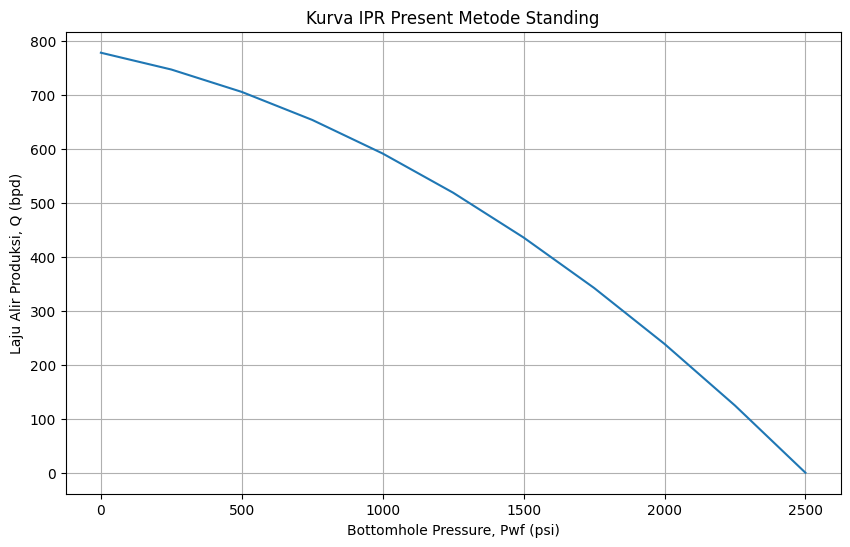

In [3]:
standing()